### What is GPT?

**Generative pre-trained transformer (GPT)** is an initial language model introduced in 2018 by OpenAI to demonstrate the power of performing natural language processing (NLP) tasks using the transformer architecture. The advancements in the GPT model show the potential of pretraining a large language model on diverse datasets to generate coherent and context-aware text.

The introduction of GPT-3 in 2020 marked a turning point because the model exhibits remarkable performance for tasks such as language translation, question answering, and creative writing to help people speed up their daily tasks.

GPT-3 provides two possibilities to interact with the OpenAI LLMs. A user can visit the browser and use a conversational style to perform tasks, or alternately, a developer can utilize the APIs provided by OpenAI to integrate the GPT model into an LLM-powered application.

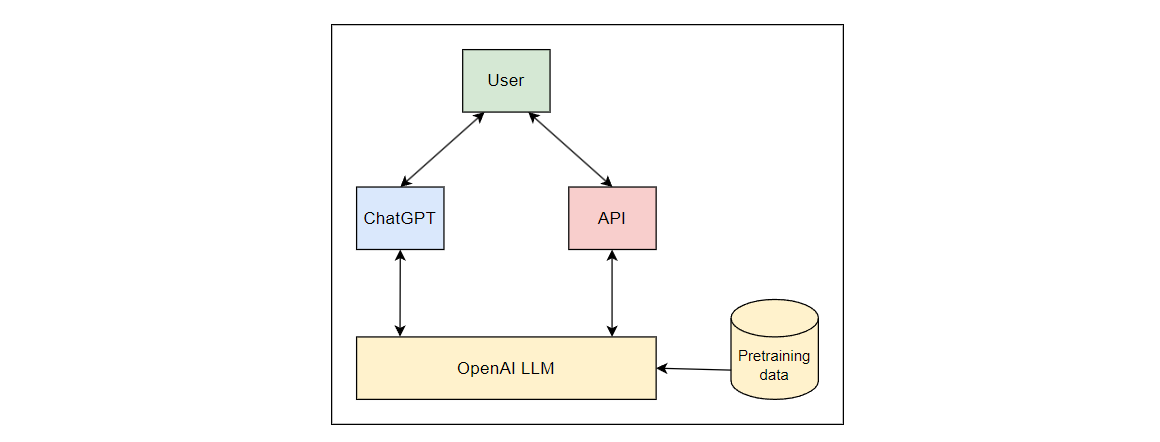

Models like GPT-3 and GPT-3.5 lack the ability to interact and extract information from the external data resource. This gives rise to the following limitations:

- **Limited knowledge**: All GPT models provide responses based on the pretrained data, and as of the time this course was written, ChatGPT’s knowledge is based on preexisting data up to January 2022. Therefore, it’s unaware of any events or updates after this cut-off date. For example, if we enquire about a recent sports event, like the result of the most recent world championship, the GPT models would not be able to answer.

- **Access to private repositories**: The GPT models don’t have access to private data in a repository like Google Drive or any external websites. This limits the GPT models’ accessibility to information.

### LangChain

LangChain is an open-source framework available in Python and JavaScript that facilitates the integration of LLMs to develop LLM-powered applications. It links the LLM and external data sources and services. This opens up new opportunities for developers to perform context-aware NLP tasks by connecting to any source of data or knowledge in real time without having to build everything from scratch.

LangChain offers a comprehensive toolkit to formalize the prompt engineering process, enabling the structured formulation of text prompts that serve as inputs to LLMs. A prompt consists of a set of instructions by a user to guide the model in generating the desired response. It can be a question, a command, or any specific input to prompt a meaningful and contextually relevant output from the model. The precision and clarity of prompts play a crucial role in influencing the output generated by the LLM. LangChain provides predefined templates of prompts for common operations, such as summarization, questions answering, etc., to help developers streamline and standardize the input to the language model.

The interaction with LangChain is centered around the concept of chains. Chains provide a mechanism to execute a sequence of calls to LLMs and tools through prompt templates. The tools refer to the functionalities that allow the LLMs to interact with the world, e.g., through an API call. This sequence of calls allows developers to harness the power of language models and efficiently integrate them into their applications.

### Getting started with HuggingFace API

Let's go through the following steps to fetch HuggingFace’s API key:

1. We'll start by first visiting [HuggingFace Website](https://huggingface.co/) and make and account to fetch API keys.

2. Now, go to this [link](https://huggingface.co/settings/tokens) to create access tokens for API access. 

3. One the above page, click on `New Token` and give a name and then change the access at the bottom to read.

4. Remember to copy the key because you won’t be able to view this key again once you click the "Done" button.

In [ ]:
#!pip -q install openai langchain huggingface_hub
#from langchain.llms import HuggingFaceHub (deprecated)

!pip install langchain_huggingface
from langchain_huggingface import HuggingFaceEndpoint

**Note**: Earlier we used HuggingFaceHub from langchain.llms but now we use HuggingFaceEndpoint. So replace HuggingFaceHub with HuggingFaceEndpoint whenever you need to use it.

In [ ]:
import os

os.environ['HUGGINGFACEHUB_API_TOKEN'] = ''

LangChain is an incredible platform that allows developers to use language models in diverse applications. It lets developers create customizable chains to fine-tune the language models according to the needs. This adaptability makes LangChain an ideal solution for a wide range of language-based tasks.

### Models and Prompts

LangChain provides a framework for developers to swiftly create LLM-powered applications. Using LangChains, developers can streamline the development process by providing several language models.

A model in the context of LangChain is any language model that is used to generate a series of words trained on a probabilistic model in a natural language. Let’s look at the two types of models LangChain offers for developing applications.

1. LLMs
2. Chat Models

### LLMs

LLMs are the core part of LangChain that takes a string as an input and returns a string at the output. LangChain provides a standard interface with several LLMs, such as OpenAI, Cohere, Hugging Face, etc.

In [ ]:
# Initiating the HuggingFace LLM with API key
llm = HuggingFaceEndpoint(repo_id="meta-llama/Meta-Llama-3-70B-Instruct")

# Query the model
response = llm.invoke("What is the tallest building in the world?")
print(response)

### Chat Models

LangChain provides built-in integration with chat models provided by OpenAI, Cohere, Hugging Face, etc. Unlike traditional “text in, text out” interfaces, chat models adopt a distinct approach, utilizing a structure where inputs and outputs are framed as chat messages. This design facilitates a more interactive and dynamic user interaction with the language model.

**The chat model in LangChain allows to communicate using different types of messages**:

- **AIMessage** shows messages that represent the AI responses.

- **SystemMessage** sets the objectives that the model needs to follow.

- **HumanMessage** represents the query sent by the human to the AI.

- **FunctionMessage** passes the function message back to the model after its execution.

- **ChatMessage** enables the arbitrary setting of a role in the chat.

Let's look at an example of how we can utilize the `SystemMessage` to define the objective for the AI in a chat between the AI and human:

In [ ]:
from langchain_core.messages import HumanMessage,SystemMessage
from langchain_huggingface import ChatHuggingFace

chat_model = ChatHuggingFace(llm=llm)

messages = [
    SystemMessage(content="You're a helpful assistant"),
    HumanMessage(
        content="What happens when an unstoppable force meets an immovable object?"
    ),
]

In [ ]:
res = chat_model.invoke(messages)
print(res.content)

---

### Prompts

A **prompt** is a query that stores the style and format of an input to a model that answers the query accordingly. Prompts play an important role in the interaction with language models. A careful crafting of prompts is essential to get the desired and effective response from the model. To ease the prompting tasks, LangChain provides prompt templates.

**Prompt templates** serve as predefined recipes for crafting prompts tailored for language models and are reusable. A prompt template may include the following:

- `Instructions`: This provides specific guidelines that instruct the language model on how to generate responses to queries.
- `Few-shot examples`: This provides examples of input-output pairs that help the language model understand the context for the given prompt.
- `User input`: This corresponds to the user’s query.

In [ ]:
# Import the PromptTemplate to create a template for a string prompt
from langchain.prompts import PromptTemplate

# Initiating the chat model with API key
llm = HuggingFaceEndpoint(repo_id="meta-llama/Meta-Llama-3-70B-Instruct")

#Define the email_template with variables that need to be filled dynamically.
email_template = PromptTemplate.from_template(
    "Create an invitation email to the recipinet that is {recipient_name} \
 for an event that is {event_type} in a language that is {language} \
 Mention the event location that is {event_location} \
 and event date that is {event_date}. \
 Also write few sentences about the event description that is {event_description} \
 in style that is {style} "
)

# Create a prompt message from the email_template
message = email_template.format(
    style = "enthusiastic tone",
    language = "American english",
    recipient_name="John",
    event_type="product launch",
    event_date="January 15, 2024",
    event_location="Hotel Taj Mahal Palace",
    event_description="an exciting unveiling of our latest innovations"
    )

response = llm.invoke(message)
print(response)

#### Few-shot prompt templates

Few-shot is a very powerful technique to guide the response of the LLM. The idea behind few-shot prompting is to provide examples to guide the model to understand and adapt to specific tasks. Using the examples, the LLM learns to apply the knowledge to similar scenarios.

In [ ]:
# importing LangChain modules
from langchain.prompts.few_shot import FewShotPromptTemplate
from langchain.prompts import PromptTemplate


# Initialize our chat model by setting the temperature to 0.0. The temperature of a model basically 
# sets the randomness of responses generated by the model. The value of this variable ranges from 
# 0 to 2. If we're looking for more consistent responses, then we should set it to 0.0
chat = ChatHuggingFace(llm=llm)

examples = [
  {
    "review": "I absolutely love this product! It exceeded my expectations.",
    "sentiment": "Positive"
  },
  {
    "review": "I'm really disappointed with the quality of this item. It didn't meet my needs.",
    "sentiment": "Negative"
  },
  {
    "review": "The product is okay, but there's room for improvement.",
    "sentiment": "Neutral"
  }
]


# Format the example_prompt as a PromptTemplate object that converts the dataset in examples 
# into a string. Here we provide review and sentiment as input variables and specify the 
# template structure "Review: {review}\n{sentiment}" to indicate how the string should be 
# formatted in the database.
example_prompt = PromptTemplate(
                        input_variables=["review", "sentiment"], 
                        template="Review: {review}\n{sentiment}")

prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    suffix="Review: {input}",
    input_variables=["input"]
)

message = prompt.format(input="The machine worked okay without much trouble.")

response = chat.invoke(message)
print(response.content)

### Chains

A chain contributes to a sequence of decision-based LLM calls connected by inputs and outputs. It can handle multiple elements of an application using prompt templates, which makes the streamlined process smooth and enhances the application’s capabilities.

**There are three different types of chains**:

1. LLM chain
2. Sequential chain
3. Router chain

#### 1. LLM Chain

An LLM chain is the simplest form of chain in LangChain. It involves input from the user, a prompt template, a language model.

In [ ]:
prompt_template = PromptTemplate(
    input_variables=["book"],
    template="Name the author of the book {book}?",
)

The `input_variables` parameter is set to the book name, and the `template` is defined to instruct the model to name the book’s author in the prompt template. This refines the query before passing it to the model since we have separated the input and expected output variables in the prompt template.

In [ ]:
chain = LLMChain(llm=llm, 
                prompt=prompt_template, 
                verbose=True)

Then, the prompt template is passed into the LLM chain, where the model answers the query.

In [ ]:
# importing the modules
#from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

# defining the LLM model (to be used with OpenAI)
#llm = OpenAI(temperature=0.0, openai_api_key="{{OpenAI_Key}}")

#defining HuggingFace LLM model
llm = llm = HuggingFaceEndpoint(repo_id="meta-llama/Meta-Llama-3-70B-Instruct")

# creating the prompt template
prompt_template = PromptTemplate(
    input_variables=["book"],
    template="Name the author of the book {book}?",
)

# creating the chain
chain = LLMChain(llm=llm, 
                prompt=prompt_template, 
                verbose=True)

# calling the chain
print(chain.run("The Da Vinci Code"))

### Sequential Chains

An `LLM chain` can be seen as a basic building block for building a complex system of chains with multiple chains. A `sequential chain` is a sequence of multiple LLM chains where the output of the former acts as the input of the next until we reach the final result.

**We can use two types of sequential chains**:

1. **Simple sequential chain**: This type of sequential chain only deals with single input and output.

2. **Multiple input sequential chain**: This type can handle relatively complex multiple inputs.

#### 1. Simple Sequential Chain

In [ ]:
# importing the modules
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chains import SimpleSequentialChain

# defining the LLM model for the first chain
llm = HuggingFaceEndpoint(repo_id="meta-llama/Meta-Llama-3-70B-Instruct")

# creating the prompt template and the first chain
prompt_1 = PromptTemplate(
    input_variables=["book"],
    template="Name the author who wrote the book {book}?"
)
chain_1 = LLMChain(llm=llm, prompt=prompt_1)

# creating the prompt template and the second chain
prompt_2 = PromptTemplate(
    input_variables=["author_name"],
    template="Write a 50-word biography for the following author:{author_name}"
)
chain_2 = LLMChain(llm=llm, prompt=prompt_2)

# combining the chains into a simple sequential chain
simple_sequential_chain = SimpleSequentialChain(chains=[chain_1, chain_2],verbose=True)

# running the simple sequential chain                                            
simple_sequential_chain.run("The Da Vinci Code")

The first chain takes the book’s name as an input and returns the author’s name.

The second chain then uses the author’s name and returns a 50-word biography of the author.

#### 2. Multiple input sequential chain

In [ ]:
# importing the modules
from langchain.llms import OpenAI
from langchain.chains import LLMChain

from langchain.prompts import ChatPromptTemplate
from langchain.chains import SequentialChain

# defining the LLM model 
llm = HuggingFaceEndpoint(repo_id="meta-llama/Meta-Llama-3-70B-Instruct")

In [ ]:
# defining the original input 
biography = "He is an American author of thriller fiction, best known for his Robert Langdon series. \
          He has sold over 200 million copies of his books, which have been translated into 56 \
          languages. His other works include Angels & Demons, The Lost Symbol, Inferno, and Origin. \
          He is a New York Times best-selling author and has been awarded numerous awards for his \
          writing."

# creating the prompt template for the first chain
prompt_1 = ChatPromptTemplate.from_template(
    "Summarize this biography in one sentence:"
    "\n\n{biography}"
)

# we input the original biography, and the output here is the one-line biography
chain_1 = LLMChain(llm=llm, prompt=prompt_1, output_key="one_line_biography")

In [ ]:
# creating the prompt template for the second chain
prompt_2 = ChatPromptTemplate.from_template(
    "Can you tell the author's name in this biography:"
    "\n\n{one_line_biography}"
)

# we input the one-line biography, and the output here is the author's name
chain_2 = LLMChain(llm=llm, prompt=prompt_2, output_key="author_name")

In [ ]:
# creating the prompt template for the third chain
prompt_3 = ChatPromptTemplate.from_template(
    "Tell the name of the highest selling book of this author: "
    "\n\n{author_name}"
)

# we input the author's name, and the output here is the highest-selling book
chain_3 = LLMChain(llm=llm, prompt=prompt_3, output_key="book")

In [ ]:
# creating the prompt template for the fourth chain
prompt_4 = ChatPromptTemplate.from_template(
   "Write a follow-up response to the following "
    "summary of the highest-selling book of the author:"
    "\n\nAuthor: {author_name}\n\nBook: {book}"
)

# we input the author's name and the highest-selling book, and the output is the book's summary
chain_4 = LLMChain(llm=llm, prompt=prompt_4, output_key="summary")

In [ ]:
# combining the chains      
final_chain = SequentialChain(
    chains=[chain_1, chain_2, chain_3, chain_4],
    input_variables=["biography"],
    output_variables=["one_line_biography", "author_name","summary"],
    verbose=True
)

# calling the final chain
print(final_chain(biography))

### Memory

LangChain provides memory buffers to facilitate a conversational interface where the information exchanged between the user and the model can be stored. These memory buffers act as a context store, allowing the model to retain and utilize relevant information from previous messages in the ongoing conversation.

Memory buffers are useful for scenarios such as dialogue systems, chatbots, virtual assistants, and interactive systems that involve multiturn interactions. This enables a more natural and intuitive communication with the language model that is contextually aware.

LangChain provides several types of memory to cater to different applications’ needs. Some of those are:

1. **Conversation Buffer** : `ConversationBufferMemory` stores the entire message history and hence it can become excessively large sometimes.
2. **Conversation Window** : `ConversationBufferWindowMemory` keeps a more manageable list of the last k interactions. This approach ensures the most recent k messages are maintained, preventing the buffer from becoming excessively large.
3. **Conversation Summary** : `ConversationSummaryMemory` module stores a summary of the interactions over time instead of keeping all or a limited number of past interactions. This method is advantageous for longer conversations, efficiently storing key information over time without overwhelming the model with excessive storage requirements.

In [ ]:
# importing LangChain modules
from langchain.memory import ConversationBufferWindowMemory
from langchain.chains import ConversationChain


# Insert your key here
llm = HuggingFaceEndpoint(repo_id="meta-llama/Meta-Llama-3-70B-Instruct")

memory = ConversationBufferWindowMemory(k=2)
memory.save_context({"input": "Alex is a 9-year old boy."}, 
                    {"output": "Hello Alex! How can I assist you today?"})
memory.save_context({"input": "Alex likes to play football"}, 
                    {"output": "That's great to hear! "})

conversation = ConversationChain(
    llm=llm,
    memory = memory,
    verbose=True
)

print(conversation.predict(input="How old is Alex?"))